# Importing Basic Libraries

In [160]:
import pandas as pd
import numpy as np

In [161]:
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt

# Reading Data from My Google-Drive

In [162]:
df = pd.read_csv('/content/drive/MyDrive/IBM INTERNSHIP/Restaurant_Reviews.tsv', sep='\t')

In [163]:
df.head(10)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


# Performing Exploratory Data Analysis (EDA)

In [164]:
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [166]:
df.groupby('Liked').describe()

Review                                    
       count unique                     top freq
Liked                                           
0        500    497  The food was terrible.    2
1        500    499      I love this place.    2

In [167]:
df['Length'] = df['Review'].apply(len)
df.head()

,Review,Liked,Length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [168]:
df.Length.describe()

count    1000.000000
mean       58.315000
std        32.360052
min        11.000000
25%        33.000000
50%        51.000000
75%        80.000000
max       149.000000
Name: Length, dtype: float64

In [169]:
df_149 =df[df['Length'] == 149]['Review']
for message in df_149:
    print(message)

The problem I have is that they charge $11.99 for a sandwich that is no bigger than a Subway sub (which offers better and more amount of vegetables).


# Data Visualisation

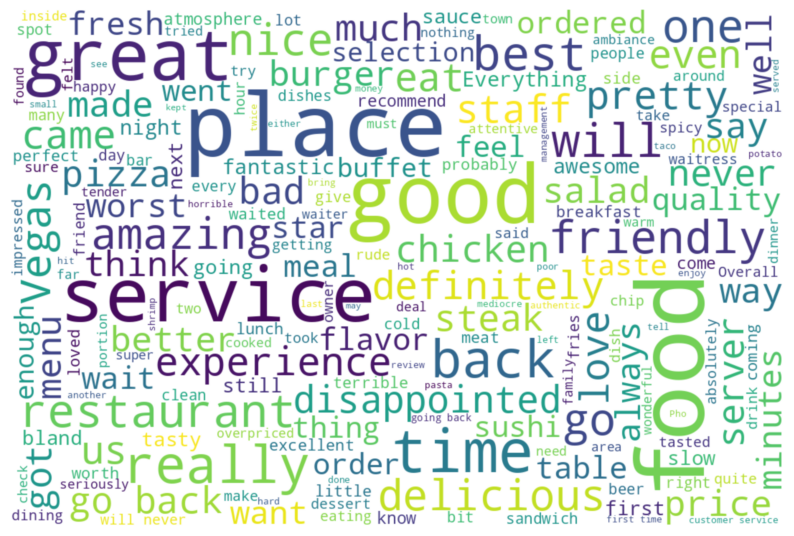

In [231]:
all_messages = ' '.join(df['Review'])
wordCloud = WordCloud(width=1080, height=720, random_state=20, max_font_size=130, background_color = 'white').generate(all_messages)
plt.figure(figsize=(10,12))
plt.imshow(wordCloud, interpolation='quadric')
plt.axis('off')
plt.show()

**CountPlot**

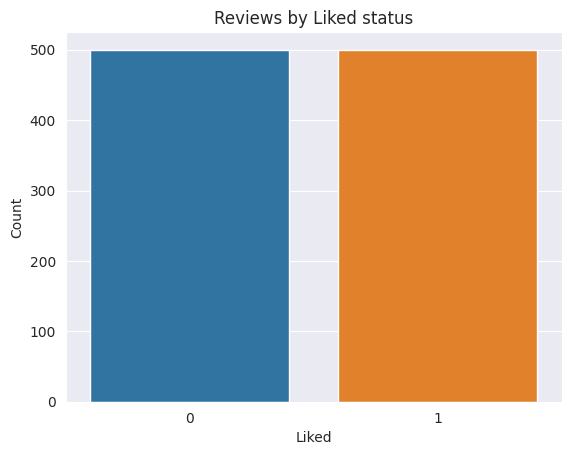

In [171]:
sns.set_style('darkgrid')
sns.countplot(x='Liked', data=df)
plt.title('Reviews by Liked status')
plt.xlabel('Liked')
plt.ylabel('Count')
plt.show()

**Histogram**

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

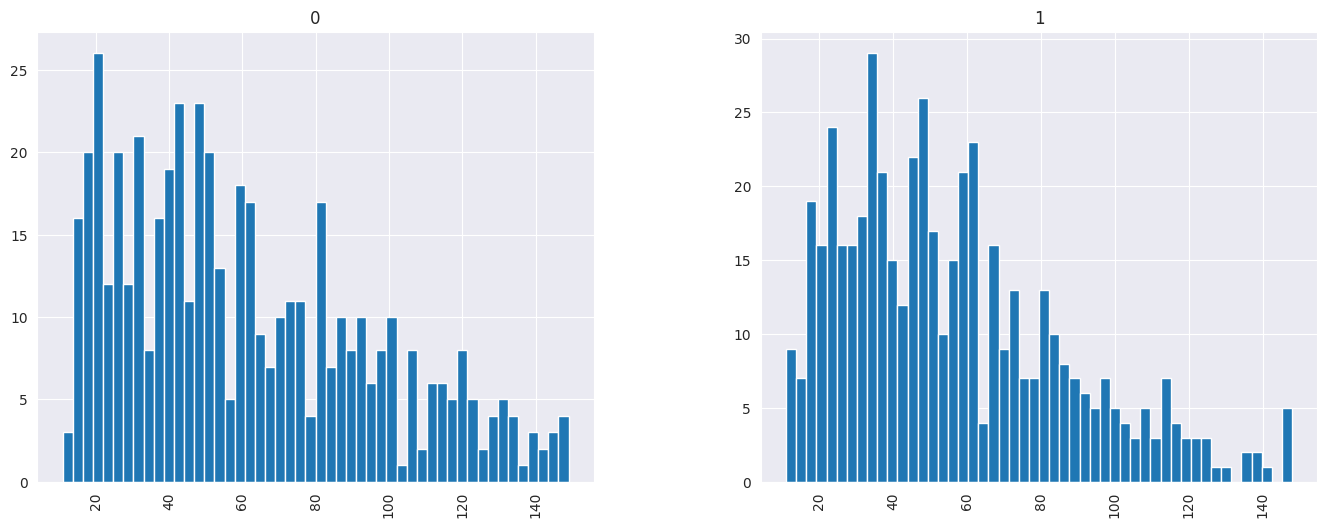

In [172]:
df.hist(column='Length', by='Liked', bins=50,figsize=(16,6))

In [173]:
df.corr()

<ipython-input-173-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Liked,Length
Liked,1.000000,-0.075285
Length,-0.075285,1.000000


**HeatMap**

<ipython-input-174-6de6c01fa820>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap= 'crest', linewidths= 0.15)


<Axes: >

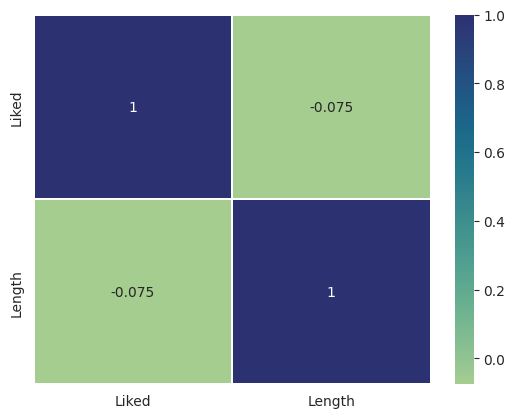

In [174]:
sns.heatmap(df.corr(), annot=True, cmap= 'crest', linewidths= 0.15)

# Data Preprocessing

In [201]:
from sklearn.feature_extraction.text import CountVectorizer

In [203]:
cv = CountVectorizer()

In [219]:
X = df['Review'].str.lower()
y = df['Liked']

# Building Classification Model (Logistic Regression)

In [207]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

In [221]:
logr = LogisticRegression()
logr.fit(X_train, y_train)

logpredictions = logr.predict(X_test)

In [222]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, logpredictions))

Confusion Matrix:
[[119  31]
 [ 21 129]]


In [223]:
print("\nClassification Report:")
print(classification_report(y_test, logpredictions))


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       150
           1       0.81      0.86      0.83       150

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



In [224]:
from sklearn.metrics import accuracy_score

In [225]:
accuracy = accuracy_score(y_test, logpredictions)
accuracy_percentage = accuracy * 100

print(f"Accuracy: {accuracy_percentage:.2f}%")

Accuracy: 82.67%
